In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np


from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string

Importing the data set

In [0]:
columns = ['userId', 'productId', 'Rating', 'timestamp']
df= pd.read_csv("/content/drive/My Drive/DLCP/Project-1/ratings_Electronics.csv",names=columns)

1. Read and explore the given dataset.  (Rename  column/add headers, plot histograms, find data  characteristics)

In [0]:
#Basic Information shape and columns
print(df.columns)
print(df.shape)

Index(['userId', 'productId', 'Rating', 'timestamp'], dtype='object')
(7824482, 4)


In [0]:
df.columns
df.head(5)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
counted_users=df.groupby('userId').count()

In [0]:
counted_users.columns=['count', 'rating', 'timestamp']

In [0]:
counted_users.head(5)

,count,rating,timestamp
userId,,,
A00000262KYZUE4J55XGL,1,1,1
A000063614T1OE0BUSKUT,2,2,2
A00009182QVLSWIGHLS1B,1,1,1
A00009661LC9LQPGKJ24G,1,1,1
A00010809P09NUU6ZP6H,1,1,1


In [0]:
counted_product=df.groupby('productId').count()
counted_product.columns=['count', 'rating', 'time']
counted_product.head(5)

,count,rating,time
productId,,,
0132793040,1,1,1
0321732944,1,1,1
0439886341,3,3,3
0511189877,6,6,6
0528881469,27,27,27


HistoGrams

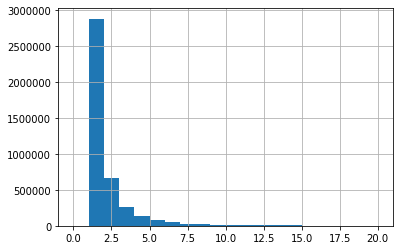

In [0]:
%matplotlib inline
counted_users['count'].hist(bins=20,range=[0,20])

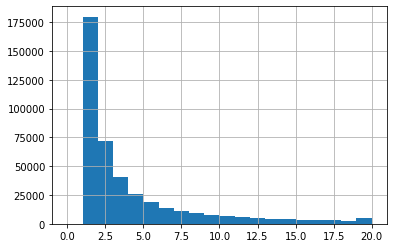

In [0]:
%matplotlib inline
counted_product['count'].hist(bins=20,range=[0,20])

In [0]:
count = df.groupby("productId", as_index=False).count()
mean = df.groupby("productId", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['productId'])
dfMerged

,userId_x,productId,Rating_x,timestamp_x,userId_y,Rating_y,timestamp_y
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,1,1,1
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,1,1,1
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,3,3,3
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,3,3,3
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,3,3,3
...,...,...,...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600,15,15,15
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400,15,15,15
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800,15,15,15
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200,15,15,15


In [0]:
#rename column
dfMerged["totalReviewers"] = dfMerged["userId_y"]
dfMerged["overallScore"] = dfMerged["Rating_x"]



dfNew = dfMerged[['productId','overallScore',"totalReviewers"]]

In [0]:
dfNew.head(5)

,productId,overallScore,totalReviewers
0,0132793040,5.0,1
1,0321732944,5.0,1
2,0439886341,1.0,3
3,0439886341,3.0,3
4,0439886341,1.0,3


2> Take a subset of the dataset to make it less sparse/ denser.  ( For example, keep the users only who has given 50 or  more number of ratings 

In [0]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 100]
dfCount

,userId_x,productId,Rating_x,timestamp_x,userId_y,Rating_y,timestamp_y,totalReviewers,overallScore
5606364,A1LTBNHUMCWM4R,B0074BW614,5.0,1360022400,18244,18244,18244,18244,5.0
5596989,A1Z1FJM43DYH9O,B0074BW614,5.0,1368748800,18244,18244,18244,18244,5.0
5596973,AQ33D1F0YJWXD,B0074BW614,1.0,1397174400,18244,18244,18244,18244,1.0
5596974,A3CK4QWTFLRTBB,B0074BW614,5.0,1366156800,18244,18244,18244,18244,5.0
5596975,AX1YPL8L9D51K,B0074BW614,2.0,1391904000,18244,18244,18244,18244,2.0
...,...,...,...,...,...,...,...,...,...
2689207,A2J574UDNLO0KR,B002LJNKNM,5.0,1309392000,100,100,100,100,5.0
2689203,A3A0VWP9PGZFFO,B002LJNKNM,5.0,1364256000,100,100,100,100,5.0
5349003,A2X9C9OKK988VA,B006AR2SKW,3.0,1357084800,100,100,100,100,3.0
5349004,ARGTZ9J3BM0T7,B006AR2SKW,5.0,1405123200,100,100,100,100,5.0


In [0]:
dfProductRating = df.groupby("productId", as_index=False).mean()
ProductRatingSummary = dfCount.groupby("productId")["overallScore"].apply(list)

In [0]:
dfProductRating

,productId,Rating,timestamp
0,0132793040,5.000000,1.365811e+09
1,0321732944,5.000000,1.341101e+09
2,0439886341,1.666667,1.358784e+09
3,0511189877,4.500000,1.397174e+09
4,0528881469,2.851852,1.314291e+09
...,...,...,...
475997,BT008G3W52,5.000000,1.355702e+09
475998,BT008SXQ4C,1.000000,1.326067e+09
475999,BT008T2BGK,5.000000,1.320883e+09
476000,BT008UKTMW,4.000000,1.361388e+09


In [0]:
df3 = pd.merge(ProductRatingSummary, dfProductRating, on="productId", how='inner')

In [0]:
df3.head(3)

,productId,overallScore,Rating,timestamp
0,0972683275,"[5.0, 5.0, 2.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, ...",4.470980,1.354610e+09
1,1400501466,"[5.0, 1.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, ...",3.560000,1.357403e+09
2,1400501776,"[3.0, 4.0, 4.0, 5.0, 3.0, 2.0, 5.0, 4.0, 3.0, ...",3.884892,1.368323e+09


In [0]:

#reset index and drop duplicate rows

df3 = df3.drop_duplicates(['Rating'], keep='last')
df3 = df3.reset_index()

In [0]:
df3.head(3)

,index,productId,overallScore,Rating,timestamp
0,0,0972683275,"[5.0, 5.0, 2.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, ...",4.470980,1.354610e+09
1,1,1400501466,"[5.0, 1.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, ...",3.560000,1.357403e+09
2,2,1400501776,"[3.0, 4.0, 4.0, 5.0, 3.0, 2.0, 5.0, 4.0, 3.0, ...",3.884892,1.368323e+09


In [0]:
df3.dtypes

index             int64
productId        object
overallScore     object
Rating          float64
timestamp       float64
dtype: object

In [0]:
df3 = df3[['productId','Rating','timestamp']]
df3.head(8)

,productId,Rating,timestamp
0,0972683275,4.470980,1.354610e+09
1,1400501466,3.560000,1.357403e+09
2,1400501776,3.884892,1.368323e+09
3,140053271X,3.900232,1.355478e+09
4,1400599997,3.490991,1.299317e+09
5,9573212919,3.879397,1.349129e+09
6,9625993428,3.420168,1.320015e+09
7,9983891212,4.442529,1.348340e+09


In [0]:
from sklearn.preprocessing import LabelEncoder
for column in df3.columns:
    if df3[column].dtype == type(object):
        le = LabelEncoder()
        df3[column] = le.fit_transform(df3[column])

In [0]:
df3.head()

,productId,Rating,timestamp
0,0,4.470980,1.354610e+09
1,1,3.560000,1.357403e+09
2,2,3.884892,1.368323e+09
3,3,3.900232,1.355478e+09
4,4,3.490991,1.299317e+09


Split the data randomly into train and test dataset. ( For  example, split it in 70/30 ratio)


In [0]:
# First let's create a dataset called X
X = np.array(df3)
# splitting data into training and test set 
from sklearn.model_selection import train_test_split

dfRating_train, dfRating_test= train_test_split(X, test_size=.30, random_state=1)


In [0]:
#len of train and test
lentrain = len(dfRating_train)
lentest = len(dfRating_test)

In [0]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

7365
3157


In [0]:
df3.head(5)

,productId,Rating,timestamp
0,0,4.470980,1.354610e+09
1,1,3.560000,1.357403e+09
2,2,3.884892,1.368323e+09
3,3,3.900232,1.355478e+09
4,4,3.490991,1.299317e+09


In [0]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfRating_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfRating_train)

In [0]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfRating_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["productId"][lentrain + i] ," average rating is ",df3["Rating"][lentrain + i])
    print ("The first similar product is ", df3["productId"][first_related_product] ," average rating is ",df3["Rating"][first_related_product])
    print ("The second similar product is ", df3["productId"][second_related_product] ," average rating is ",df3["Rating"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  7365  average rating is  3.6699507389162562
The first similar product is  4080  average rating is  3.7468706536856744
The second similar product is  4126  average rating is  4.383211678832117
-----------------------------------------------------------
Based on product reviews, for  7366  average rating is  3.6056338028169015
The first similar product is  5569  average rating is  3.307017543859649
The second similar product is  6695  average rating is  3.848375451263538
-----------------------------------------------------------
Based on product reviews, for  7367  average rating is  3.2205240174672487
The first similar product is  1888  average rating is  4.266187050359712
The second similar product is  2668  average rating is  4.649122807017544
-----------------------------------------------------------
Based on product reviews, for  7368  average rating is  4.046838407494145
The first similar product is  1260  average rating is  3.032520325203252
The se

In [0]:
Build Popularity Recommender model

In [0]:

print ("Based on product reviews, for ", df3["productId"][260] ," average rating is ",df3["Rating"][260])
print ("The first similar product is ", df3["productId"][first_related_product] ," average rating is ",df3["Rating"][first_related_product])
print ("The second similar product is ", df3["productId"][second_related_product] ," average rating is ",df3["Rating"][second_related_product])
print ("-----------------------------------------------------------")

Based on product reviews, for  260  average rating is  4.593220338983051
The first similar product is  3901  average rating is  3.0990259740259742
The second similar product is  5541  average rating is  4.314606741573034
-----------------------------------------------------------


In [0]:
df3.dtypes

productId      int64
Rating       float64
timestamp    float64
dtype: object

In [0]:
df5_train_target = df3["Rating"][:lentrain]
df5_test_target = df3["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfRating_train, df5_train_target)
knnpreds_test = knnclf.predict(dfRating_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.05      0.06      0.06       108
           3       0.34      0.42      0.38      1081
           4       0.63      0.54      0.58      1963

    accuracy                           0.48      3157
   macro avg       0.26      0.26      0.25      3157
weighted avg       0.51      0.48      0.49      3157



In [0]:

print (accuracy_score(df5_test_target, knnpreds_test))

0.48210326259106745


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(mean_squared_error(df5_test_target, knnpreds_test))

0.6689895470383276


In [0]:
df5_train_target = df3["Rating"][:lentrain]
df5_test_target = df3["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfRating_train, df5_train_target)
knnpreds_test = knnclf.predict(dfRating_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.06      0.06      0.06       108
           3       0.35      0.42      0.38      1081
           4       0.63      0.56      0.59      1963

    accuracy                           0.49      3157
   macro avg       0.26      0.26      0.26      3157
weighted avg       0.51      0.49      0.50      3157



In [0]:

print (accuracy_score(df5_test_target, knnpreds_test))

0.4941400063351283


In [0]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.6411149825783972


NEW:
Popularity Model
A common (and usually hard-to-beat) baseline approach is the Popularity model. This model is not actually personalized - it simply recommends to a user the most popular items that the user has not previously consumed. As the popularity accounts for the "wisdom of the crowds", it usually provides good recommendations, generally interesting for most people.
Ps. The main objective of a recommender system is to leverage the long-tail items to the users with very specific interests, which goes far beyond this simple technique.

In [0]:
#Computes the most popular items
Product_popularity_df = df.groupby('productId')['Rating'].sum().sort_values(ascending=False).reset_index()
Product_popularity_df.head(10)

,productId,Rating
0,B0074BW614,81943.0
1,B00DR0PDNE,64681.0
2,B007WTAJTO,62697.0
3,B0019EHU8G,58409.0
4,B006GWO5WK,52751.0
5,B003ELYQGG,51028.0
6,B003ES5ZUU,48346.0
7,B007R5YDYA,46473.0
8,B00622AG6S,43419.0
9,B0002L5R78,42204.0


In [0]:
dfNew.dtypes

productId          object
overallScore      float64
totalReviewers      int64
dtype: object

In [0]:
# First let's create a dataset called X
X = np.array(df3)
# splitting data into training and test set 
from sklearn.model_selection import train_test_split

dfRating_train, dfRating_test= train_test_split(X, test_size=.30, random_state=1)

In [0]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfRating_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfRating_train)

In [0]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfRating_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["productId"][lentrain + i] ," average rating is ",df3["Rating"][lentrain + i])
    print ("The first similar product is ", df3["productId"][first_related_product] ," average rating is ",df3["Rating"][first_related_product])
    print ("The second similar product is ", df3["productId"][second_related_product] ," average rating is ",df3["Rating"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  7365  average rating is  3.6699507389162562
The first similar product is  4080  average rating is  3.7468706536856744
The second similar product is  4126  average rating is  4.383211678832117
-----------------------------------------------------------
Based on product reviews, for  7366  average rating is  3.6056338028169015
The first similar product is  5569  average rating is  3.307017543859649
The second similar product is  6695  average rating is  3.848375451263538
-----------------------------------------------------------
Based on product reviews, for  7367  average rating is  3.2205240174672487
The first similar product is  1888  average rating is  4.266187050359712
The second similar product is  2668  average rating is  4.649122807017544
-----------------------------------------------------------
Based on product reviews, for  7368  average rating is  4.046838407494145
The first similar product is  1260  average rating is  3.032520325203252
The se

In [0]:
df5_train_target = df3["Rating"][:lentrain]
df5_test_target = df3["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfRating_train, df5_train_target)
knnpreds_test = knnclf.predict(dfRating_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.06      0.06      0.06       108
           3       0.35      0.42      0.38      1081
           4       0.63      0.56      0.59      1963

    accuracy                           0.49      3157
   macro avg       0.26      0.26      0.26      3157
weighted avg       0.51      0.49      0.50      3157



In [0]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.4941400063351283


In [0]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.6411149825783972



kNN with k = 3

In [0]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfRating_train)

distances, indices = neighbor.kneighbors(dfRating_train)

In [0]:
df5_train_target = df3["Rating"][:lentrain]
df5_test_target = df3["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfRating_train, df5_train_target)
knnpreds_test = knnclf.predict(dfRating_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.05      0.06      0.06       108
           3       0.34      0.42      0.38      1081
           4       0.63      0.54      0.58      1963

    accuracy                           0.48      3157
   macro avg       0.26      0.26      0.25      3157
weighted avg       0.51      0.48      0.49      3157

Accuracy:  0.48210326259106745
MSE:  0.6689895470383276


In [0]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfRating_train)
distances, indices = neighbor.kneighbors(dfRating_train)

In [0]:
df5_train_target = df3["Rating"][:lentrain]
df5_test_target = df3["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfRating_train, df5_train_target)
knnpreds_test = knnclf.predict(dfRating_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.06      0.06      0.06       108
           3       0.35      0.42      0.38      1081
           4       0.63      0.56      0.59      1963

    accuracy                           0.49      3157
   macro avg       0.26      0.26      0.26      3157
weighted avg       0.51      0.49      0.50      3157

Accuracy:  0.4941400063351283
MSE:  0.6411149825783972


In [0]:
df3.columns

Index(['productId', 'Rating', 'timestamp'], dtype='object')

In [0]:
!pip install -q surprise 

     |████████████████████████████████| 6.5MB 9.2MB/s 


In [0]:
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split



In [0]:



# First let's create a dataset called X
X = np.array(df3)
# splitting data into training and test set 
from sklearn.model_selection import train_test_split

Rating_train, Rating_test= train_test_split(X, test_size=.30, random_state=1)

In [0]:
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms.baseline_only import BaselineOnly

# param_grid = {'bsl_options': {'method': ['als'],
#                              'n_epochs': random.sample(range(10, 20), 5),
#                              'reg_u': random.sample(range(10, 30), 5),
#                              'reg_i': random.sample(range(10, 30), 5)}}

# gs = GridSearchCV(BaselineOnly, param_grid, measures=['RMSE', 'MAE'], cv=5, n_jobs = -1)
# gs.fit(data)
# print(gs.best_score['rmse'], gs.best_params['rmse'])

bsl_options = {'method': 'als', 'n_epochs': 18, 'reg_u': 11, 'reg_i': 11}

algo = BaselineOnly(bsl_options=bsl_options)
fit = algo.fit(Rating_train)
predictions = fit.test(Rating_test)
accuracy.rmse(predictions, verbose=False)

Estimating biases using als...


AttributeError: ignored

In [0]:
from surprise import SVD

# param_grid = {'n_epochs': range(5, 20),
#               'lr_all': np.linspace(0.1,0.020,9),
#               'reg_all': np.linspace(0.1,1,10)}

# gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)

# gs.fit(data)

# best RMSE score
# print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
# print(gs.best_params['rmse'])

In [0]:

algo = SVD(n_epochs=19, lr_all=0.02, reg_all=0.2)
fit = algo.fit(Rating_test)
predictions = algo.test(Rating_train)
accuracy.rmse(predictions, verbose=False)

AttributeError: ignored

In [0]:
rom collections import defaultdict


def get_top_n(predictions, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


top_n = get_top_n(predictions, n=10)

In [0]:
top_n[reviews.customer_id[8]]